In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv('/home/sushil/Downloads/Fraud_check.csv')

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [12]:
fraud = fraud.rename(columns = {'Marital.Status' : 'marital_status' , 'Taxable.Income' : 'taxable_income' , 'City.Population' : 'city_population' , 'Work.Experience' : 'work_experience'})

In [13]:
fraud.head()

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


(array([57., 53., 75., 58., 56., 59., 64., 53., 52., 73.]),
 array([10003. , 18964.6, 27926.2, 36887.8, 45849.4, 54811. , 63772.6,
        72734.2, 81695.8, 90657.4, 99619. ]),
 <BarContainer object of 10 artists>)

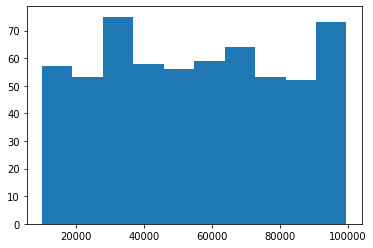

In [14]:
plt.hist(fraud.taxable_income)

<AxesSubplot:xlabel='taxable_income'>

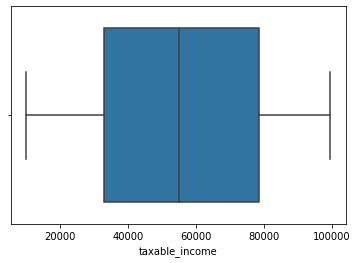

In [15]:
sns.boxplot(fraud.taxable_income)

(array([70., 61., 68., 60., 64., 64., 51., 61., 42., 59.]),
 array([ 25779. ,  43178.9,  60578.8,  77978.7,  95378.6, 112778.5,
        130178.4, 147578.3, 164978.2, 182378.1, 199778. ]),
 <BarContainer object of 10 artists>)

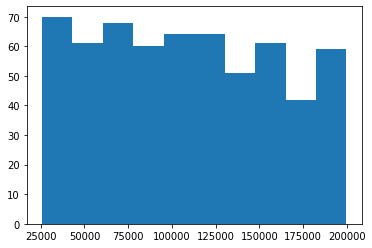

In [16]:
plt.hist(fraud.city_population)

<AxesSubplot:xlabel='city_population'>

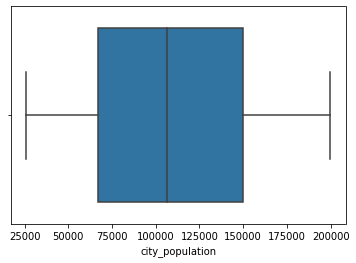

In [17]:
sns.boxplot(fraud.city_population)

(array([47., 50., 54., 67., 77., 55., 47., 52., 58., 93.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

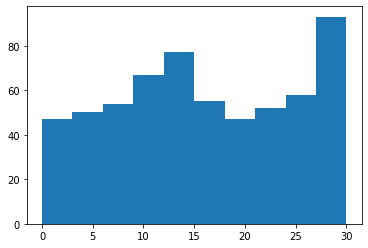

In [18]:
plt.hist(fraud.work_experience)

<AxesSubplot:xlabel='work_experience'>

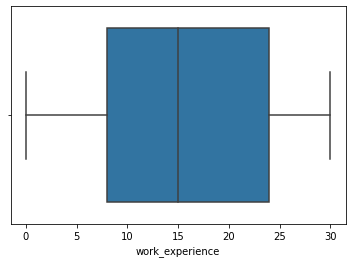

In [19]:
sns.boxplot(fraud.work_experience)

In [20]:
fraud.isnull().sum()

Undergrad          0
marital_status     0
taxable_income     0
city_population    0
work_experience    0
Urban              0
dtype: int64

<AxesSubplot:>

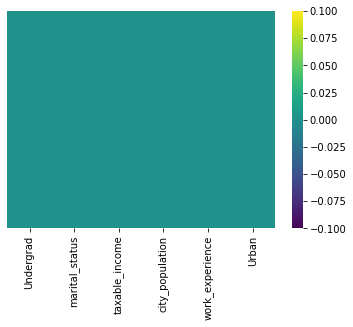

In [21]:
sns.heatmap(fraud.isnull(), yticklabels = False, cmap = 'viridis' )

In [22]:
def cal(i):
    
    if i <= 30000:
        return 'Risky'
    
    else:
        return 'Good'

In [24]:
fraud['taxable_income'] = fraud['taxable_income'].apply(cal)

In [25]:
fraud['taxable_income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_income, Length: 600, dtype: object

<AxesSubplot:xlabel='taxable_income', ylabel='count'>

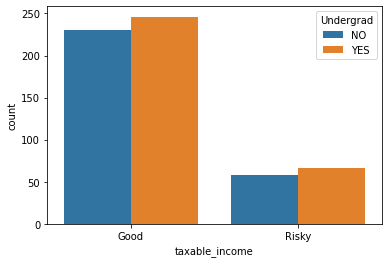

In [28]:
sns.countplot('taxable_income',hue = 'Undergrad', data = fraud)

<AxesSubplot:xlabel='taxable_income', ylabel='work_experience'>

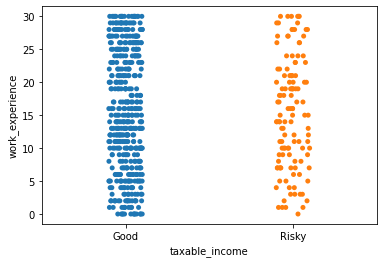

In [29]:
sns.stripplot(x = 'taxable_income', y = 'work_experience', data = fraud)

<AxesSubplot:xlabel='taxable_income', ylabel='city_population'>

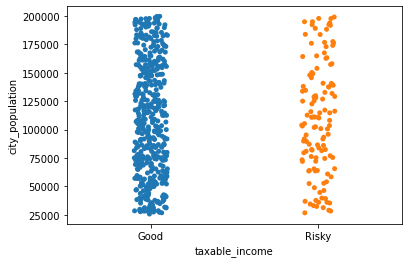

In [31]:
sns.stripplot(x = 'taxable_income', y = 'city_population', data = fraud)

In [33]:
#sns.stripplot(x = 'taxable_income', y = 'Urban', data = fraud)

In [35]:
fraud_new = pd.get_dummies(fraud[['Undergrad', 'marital_status', 'Urban']])

In [36]:
fraud_new

,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,1,0,0,0,1,0,1
1,0,1,1,0,0,0,1
2,1,0,0,1,0,0,1
3,0,1,0,0,1,0,1
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
595,0,1,1,0,0,0,1
596,0,1,1,0,0,0,1
597,1,0,1,0,0,0,1
598,0,1,0,1,0,1,0


In [38]:
fraud_new = pd.concat([fraud[['work_experience','city_population','taxable_income']],fraud_new],axis = 1)

In [39]:
fraud_new

,work_experience,city_population,taxable_income,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,10,50047,Good,1,0,0,0,1,0,1
1,18,134075,Good,0,1,1,0,0,0,1
2,30,160205,Good,1,0,0,1,0,0,1
3,15,193264,Good,0,1,0,0,1,0,1
4,28,27533,Good,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,7,39492,Good,0,1,1,0,0,0,1
596,2,55369,Good,0,1,1,0,0,0,1
597,0,154058,Good,1,0,1,0,0,0,1
598,17,180083,Good,0,1,0,1,0,1,0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
x = fraud_new.drop('taxable_income',axis = 1)

In [44]:
x.head()

,work_experience,city_population,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,10,50047,1,0,0,0,1,0,1
1,18,134075,0,1,1,0,0,0,1
2,30,160205,1,0,0,1,0,0,1
3,15,193264,0,1,0,0,1,0,1
4,28,27533,1,0,0,1,0,1,0


In [45]:
y = fraud_new['taxable_income']

In [46]:
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: taxable_income, dtype: object

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4)

In [48]:
model = DecisionTreeClassifier(criterion = 'entropy')

In [49]:
model

DecisionTreeClassifier(criterion='entropy')

In [50]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [51]:
predictions = model.predict(x_test)

In [52]:
predictions

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Go

In [53]:
print(confusion_matrix(y_test,predictions))

[[148  42]
 [ 39  11]]


In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        Good       0.79      0.78      0.79       190
       Risky       0.21      0.22      0.21        50

    accuracy                           0.66       240
   macro avg       0.50      0.50      0.50       240
weighted avg       0.67      0.66      0.67       240

